<h1><center>Physique numérique (PHY-3500)</center></h1>
<h1><center>TP2 - Résolution d'équations non-linéaires</center></h1>

## Nom des membres de l'équipe :

### Nom, Prénom :  NI 
### Légaré, Ophélie : 111 182 608
### Parrot, Anaïs : 111 184 980
### Turgeon, David : 111 182 265

### Importation des modules :

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Introduction : 

Il était une fois le TP2... À remettre dans moins d'une semaine, nos protagonistes vont-ils y parvenir? C'est à suivre, avec un stress pas moins palpable...

# Le potentiel de Lennard-Jones

What the fuck is happening here?? OMG  :'(

## Question 1 :

In [3]:
"""
Trouver r pour p(r) = 0 sachant p(r) = ±[2mu(epsilon_n*V0-V(r))]^(1/2)
epsilon_n = E_n/V0 = p^2/(2mu) + V(r)
V(r) = 4V0[(sigma/r)^6-(sigma/r)^12]
Évaluation numérique du résultat
"""
def rebroussement_pts(V_0,sigma,mu, epsilon_n,autre_variable):
    pass


## Question 2 :

In [4]:
"""
### Méthode à validé ###
Itérer sur des valeurs de epsilon_n jusqu'à ce que la valeur soit de (n+1/2)/gamma
Utilisé la fonction en 1 pour déterminé les bornes de l'intégrale
intégrale de l'équation 9
"""

"\n### Méthode à validé ###\nItérer sur des valeurs de epsilon_n jusqu'à ce que la valeur soit de (n+1/2)/gamma\nUtilisé la fonction en 1 pour déterminé les bornes de l'intégrale\nintégrale de l'équation 9\n"

## Question 3 :

In [5]:
"""
Utilisé les fonctions fait en 1 et 2 pour plot les différents graph
"""

'\nUtilisé les fonctions fait en 1 et 2 pour plot les différents graph\n'

## Question 4 :

In [6]:
"""
On s'en reparlera xD
"""

"\nOn s'en reparlera xD\n"

# Pandémie et relaxation

Le gouvernement du Québec : La santé mentale de nos étudiants est précaire depuis quelques mois et c'est pourquoi nous avons décidé, après délibérations, de permettre la réouverture progressive de nos établissements post-secondaires. [...]

Le prof : Heille, la pandémie pis toute là... Ça m'inspire des questions de TP à moé! Je vais leur fucking faire calculer le pourcentage prédit de personnes qui auront été infectées au terme de la pandémie. :D  Oh oh man, mes idées me font bander dur!! J'suis un génie!

On veut évaluer le pourcentage $p$ de la population qui aura ́eté infecté au terme de la pandémie de la COVID-19 grâce à la méthode de la relaxation, et ce, pour un nombre de reproduction de base $R_0$ entre 0 et 5,7.

In [30]:
def modele_pandemie(p, R_0):
    return 1 - np.exp(-R_0*p)

def derivee_modele_pandemie(p, R_0):
    return R_0 * np.exp(-R_0*p)

def erreur_modele_pandemie(p, R_0, p_prime):
    return (p - p_prime) / (1 - 1/(derivee_modele_pandemie(p, R_0)))

def relaxation(p, R_0, precision):
    p_prime = modele_pandemie(p, R_0)
    
    nb_iterations = 1
    while abs(erreur_modele_pandemie(p, R_0, p_prime)) > precision:
        p = p_prime
        p_prime = modele_pandemie(p, R_0)
        nb_iterations +=1

    return p_prime, nb_iterations

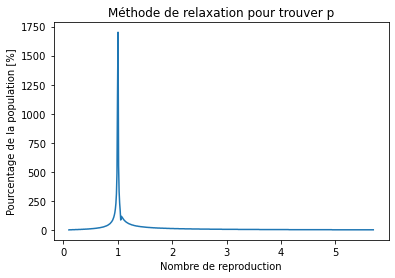

In [31]:
R_0 = np.linspace(0.1, 5.7, 571)

p = []
for i in R_0:
    p.append(relaxation(0.1, i, 10e-6)[1])


plt.figure()
plt.plot(R_0, p)
plt.xlabel("Nombre de reproduction")
plt.ylabel("Pourcentage de la population [%]")
plt.title("Méthode de relaxation pour trouver p")


plt.show()

## Question 5 :

# Pandémie et relaxation accélérée

On constate à la précédente question que cela prend un certain temps avant que la solution converge avec la précision voulue en utilisant la méthode de relaxation. On va donc recommencer avec la méthode de relaxation accélérée. Cette méthode consiste à prendre l'estimation calculée à chaque itération et à la projeter un peu plus loin en espérant que cela nous rapproche de la vraie solution, ce qui permettrait d'accélérer le processus de relaxation.

## Question 6 :

Démonstration d'équations : Yé, ça faisait longtemps!

## Question 7 :

## Question 8 :

Pour calculer l'erreur faite sur l'estimation de la solution, il nous faut la dérivée de l'équation utilisée. Dans ce cas, la dérivée est très simple à calculer :
$$ \frac{d}{dx} \left[1-\exp(-R_0 p)\right] = R_0\exp(-R_0 p) $$

In [25]:
def modele_pandemie(p, R_0):
    return 1 - np.exp(-R_0*p)

def derivee_modele_pandemie(p, R_0):
    return R_0 * np.exp(-R_0*p)

def erreur_estime_accelere(p, p_prime, omega, derivee):
    long_terme = (1 + omega) * derivee - omega
    return (p - p_prime) / (1 - 1/long_terme)

def relaxation_acceleree(p, R_0, omega, precision):
    p_prime = (1 + omega) * modele_pandemie(p, R_0) - omega * p
    
    nb_iterations = 1
    while abs(erreur_estime_accelere(p, p_prime, omega, derivee_modele_pandemie(p, R_0))) > precision:
        p = p_prime
        p_prime = (1 + omega) * modele_pandemie(p, R_0) - omega * p
        nb_iterations += 1
        
    return p_prime, nb_iterations

De la question 7, on voit que la solution tourne autour de 0,797. On pose donc le premier $p$ à 0,1 pour bien voir la différence apportée par le choix du paramètre $\omega$. On prend le point de départ donné à 0,5 pour $\omega$ et on regarde le nombre d'itérations nécessaire pour atteindre une précision de $10^{-6}$. On augmente alors graduellement la valeur de $\omega$ pour déterminer la valeur optimale de ce paramètre.

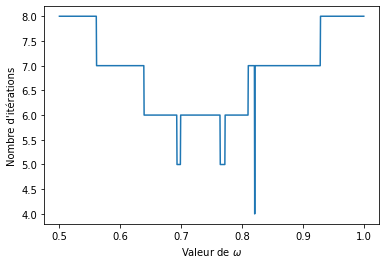

In [26]:
omega = np.linspace(0.5, 1, 1000)

iterations = []
for i in omega:
    iterations.append(relaxation_acceleree(0.1, 2, i, 10e-6)[1])
    
plt.figure()
plt.plot(omega, iterations)
plt.xlabel("Valeur de $\omega$")
plt.ylabel("Nombre d'itérations")
plt.show()

D'après ce graphique, la méthode de relaxation accélérée semble plus rapide lorsque $\omega$ vaut aux alentours de 0,768 et de 0,696. On pose donc que le $\omega$ optimal pour cette fonction est la moyenne de ces deux valeurs, soit à 0,732. On peut ainsi estimer la fonction de modélisation des pandémies avec ce $\omega$ optimal et pour $R_0$ = 2, en souhaitant une précision de $10^{-6}$, et déterminer le nombre d'itérations nécessaire pour y parvenir en partant de $p$ = 0,1.

In [27]:
sln = relaxation_acceleree(0.1, 2, 0.732, 10e-6)
print("Il faut", sln[1], "itérations pour atteindre la précision voulue. Cela donne p =", sln[0])

Il faut 6 itérations pour atteindre la précision voulue. Cela donne p = 0.7968105208881933


## Question 9 :

Corrigé manuel : 
 We might want to use an omega < 0 if at each iteration the function overshoots the solution, i.e., we start at x=2 and the next iteration gives x=3, but the solution is 2.5